##### 1.(Linear Regression) Plot 10 samples, spaced uniformly in range [0, 1], with the function sin(2πx) with a Gaussian noise like below.
![스크린샷 2025-03-18 172150.png](<attachment:스크린샷 2025-03-18 172150.png>)
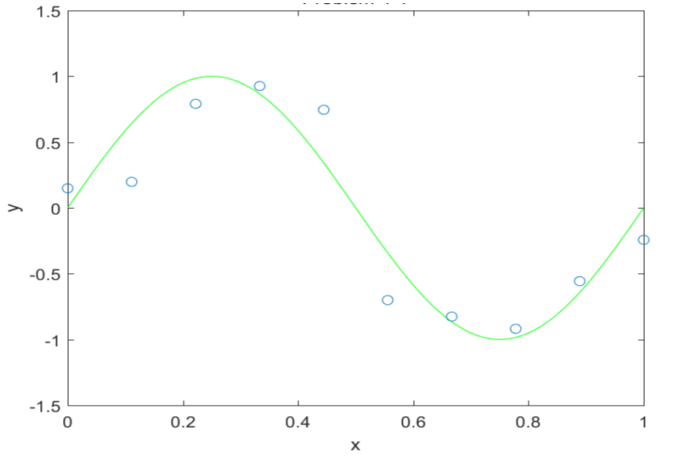

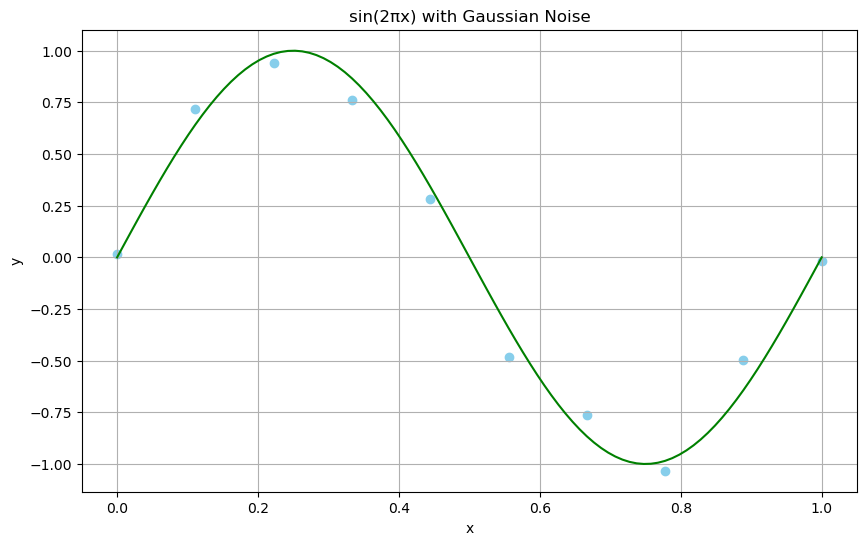

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 10 samples uniformly spaced in [0, 1]
x = np.linspace(0, 1, 10)

# y = sin(2πx)
y_origin = np.sin(2 * np.pi * x)

# Gaussian noise
noise = np.random.normal(0, 0.1, len(x))  # mean=0, std=0.1
y_noisy = y_origin + noise

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='skyblue', marker='o')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), 
         'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(2πx) with Gaussian Noise')
plt.grid(True)
plt.show()

1-1. Generate regression line with polynomial basis function with the first order. See and compare the
regression lines with second order, 5th order, 9th order, and 15th order, respectively.

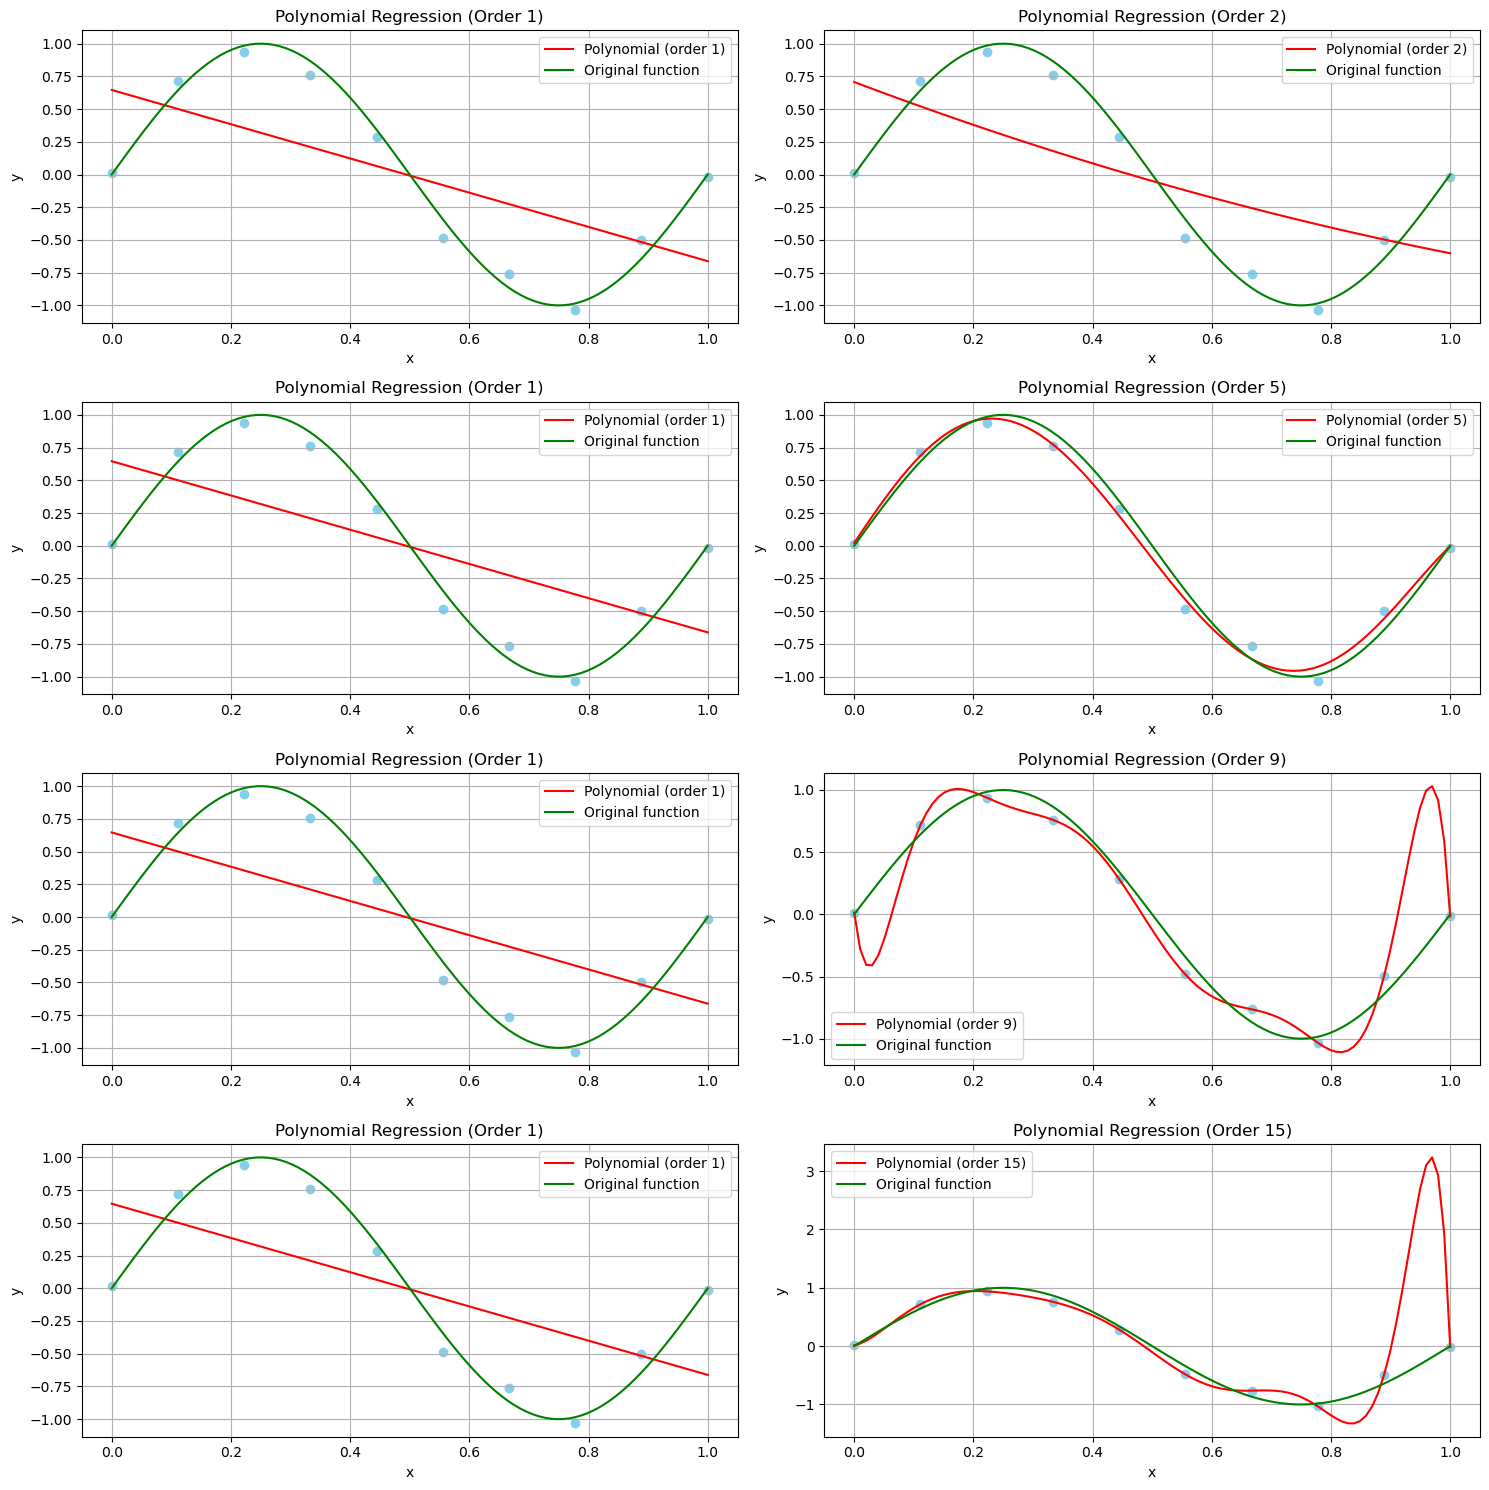

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
orders = [1, 2, 1, 5, 1, 9, 1, 15] # left: 1 order, right: 2, 5, 9, 15 order polynomials
x_test = np.linspace(0, 1, 100).reshape(-1, 1)

for idx, order in enumerate(orders):
    row, col = idx // 2, idx % 2
    
    # Prepare data
    X = x.reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X)
    X_test_poly = poly_features.transform(x_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y_noisy)
    y_pred = model.predict(X_test_poly)
    
    # Plot
    axs[row, col].scatter(x, y_noisy, color='skyblue', marker='o')
    axs[row, col].plot(x_test, y_pred, 'red', label=f'Polynomial (order {order})')
    axs[row, col].plot(x_test, np.sin(2 * np.pi * x_test), 'green', label='Original function')
    axs[row, col].set_xlabel('x')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f'Polynomial Regression (Order {order})')
    axs[row, col].grid(True)
    axs[row, col].legend()

plt.tight_layout()
plt.show()

1-2. Add 2 or 3 points of exceptional outliers that do not follow sin(2πx) and then generate regression
lines with polynomial basis functions (with 1st , 2nd , 5th , 9th , and 15th , respectively). 

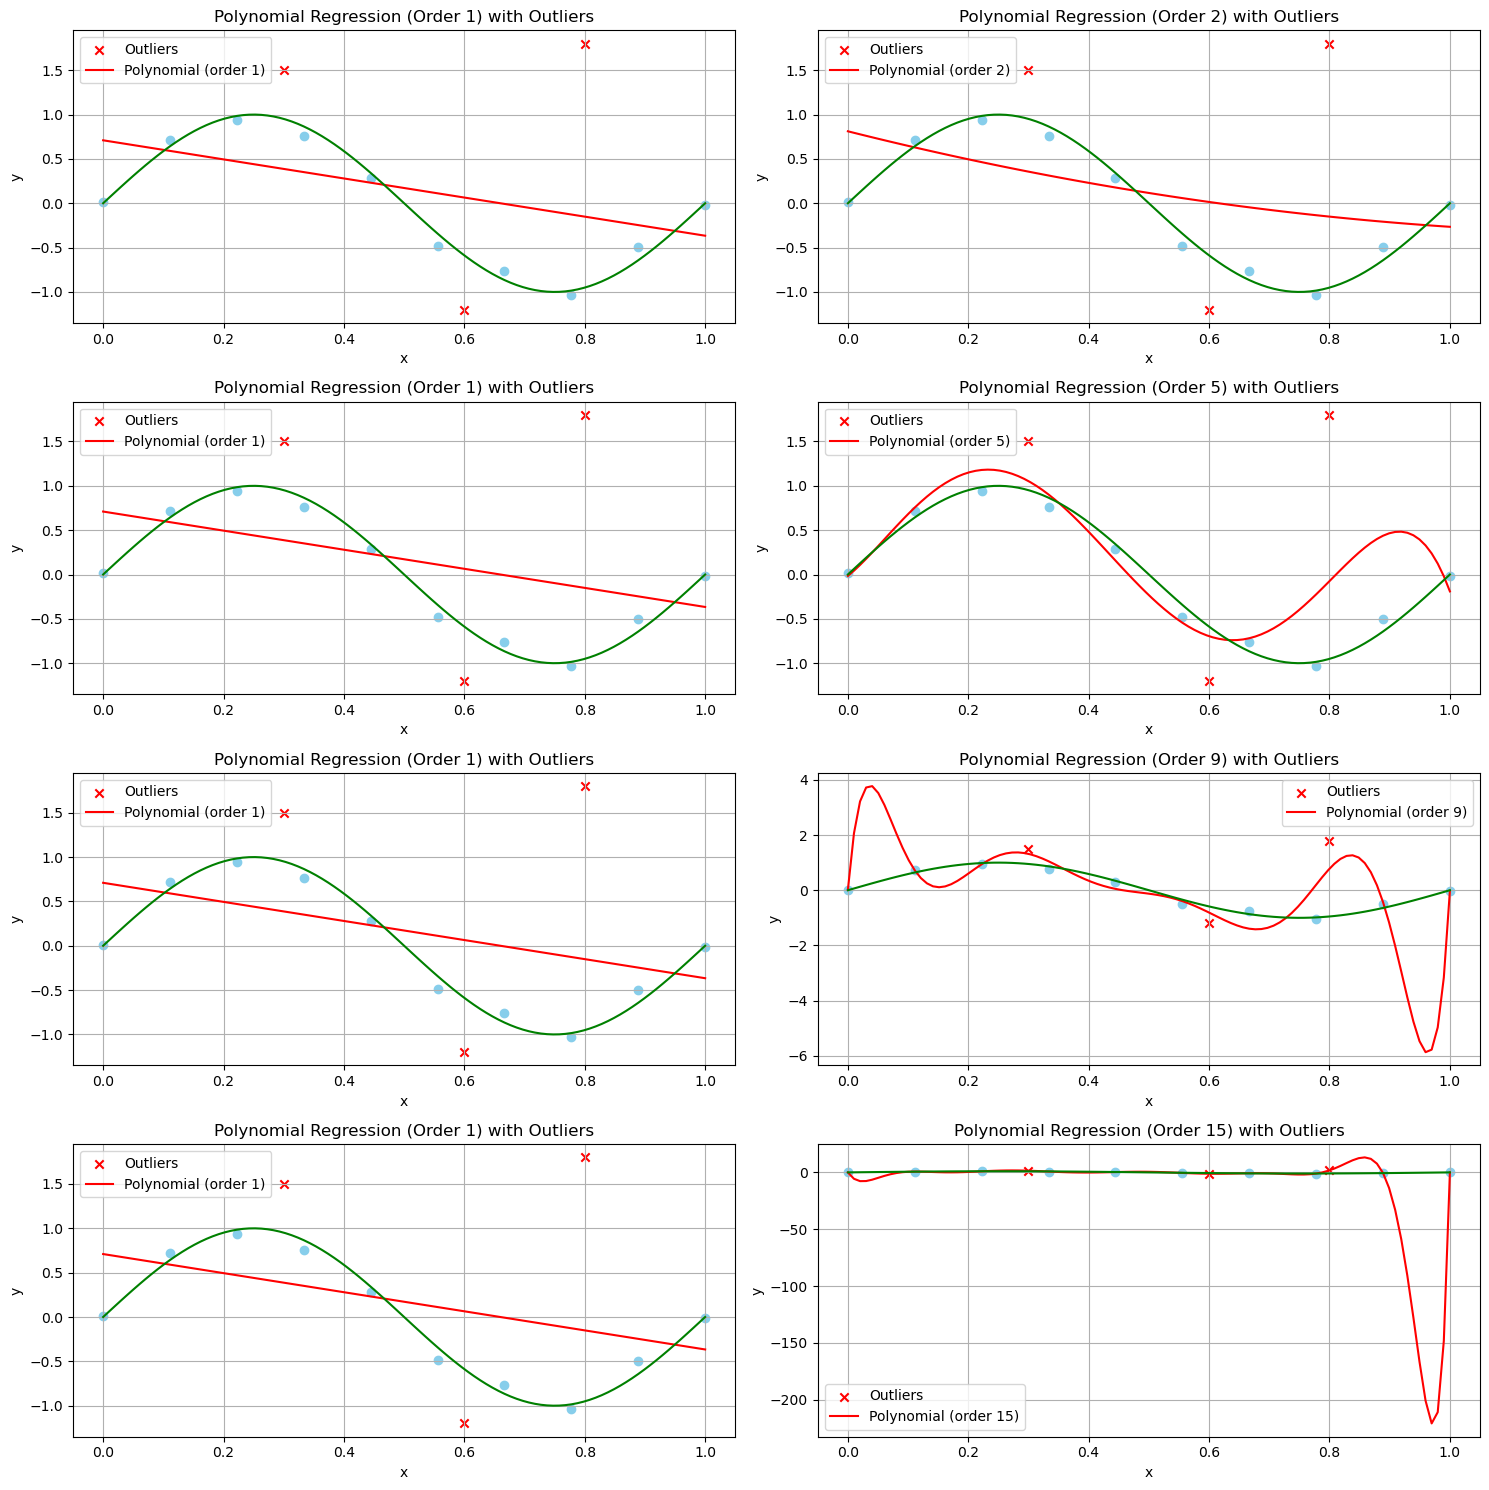

In [5]:
# Add outliers
x_outliers = np.array([0.3, 0.6, 0.8])
y_outliers = np.array([1.5, -1.2, 1.8])
x_with_outliers = np.concatenate([x, x_outliers])
y_with_outliers = np.concatenate([y_noisy, y_outliers])

# Subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
orders = [1, 2, 1, 5, 1, 9, 1, 15]
x_test = np.linspace(0, 1, 100).reshape(-1, 1)

for idx, order in enumerate(orders):
    row, col = idx // 2, idx % 2
    
    # Prepare data
    X = x_with_outliers.reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X)
    X_test_poly = poly_features.transform(x_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y_with_outliers)
    y_pred = model.predict(X_test_poly)
    
    # Plot
    axs[row, col].scatter(x, y_noisy, color='skyblue', marker='o')
    axs[row, col].scatter(x_outliers, y_outliers, color='red', marker='x', label='Outliers')
    axs[row, col].plot(x_test, y_pred, 'red', label=f'Polynomial (order {order})')
    axs[row, col].plot(x_test, np.sin(2 * np.pi * x_test), 'green')
    axs[row, col].set_xlabel('x')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f'Polynomial Regression (Order {order}) with Outliers')
    axs[row, col].grid(True)
    axs[row, col].legend()

plt.tight_layout()
plt.show()

1-3. For the case including the outliers, generate the regression lines with the L2 regularization term.
Show how the lines are changed with respect to λ. Generate the regression lines with the L1
regularization term and compare the lines with L2 regularization.

c:\Users\i4u11\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.042e+00, tolerance: 1.080e-03
  model = cd_fast.enet_coordinate_descent(


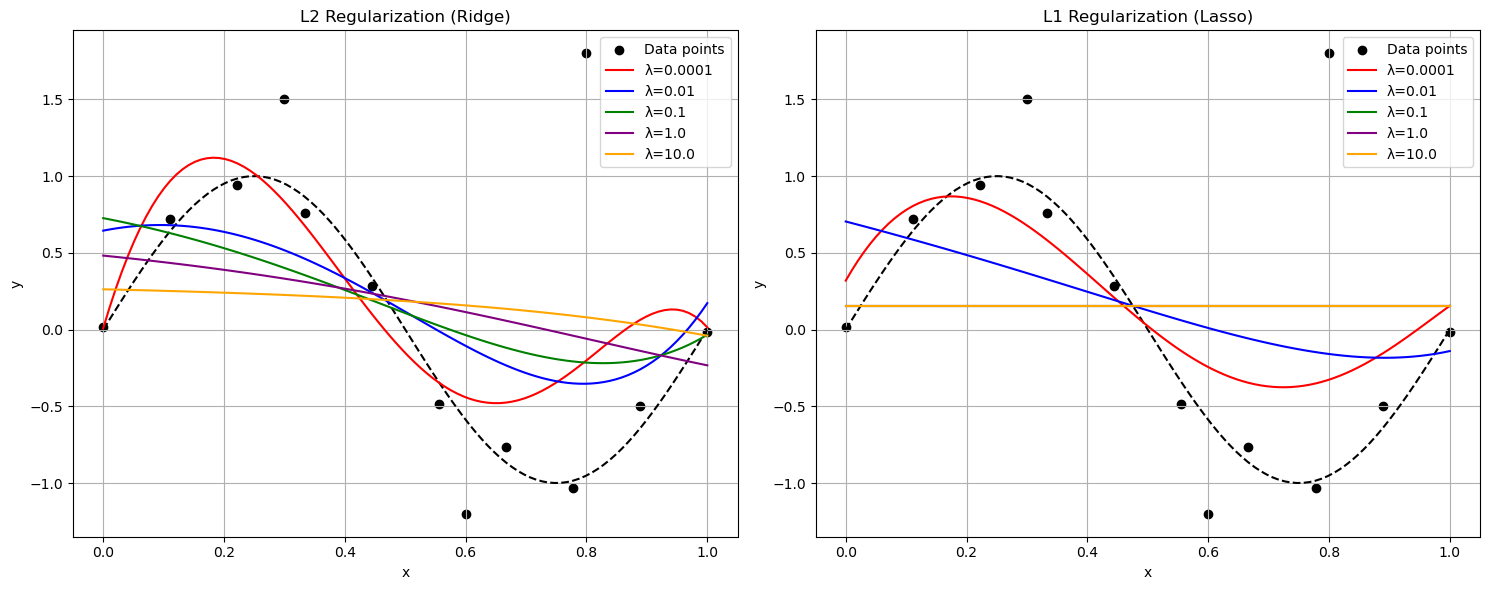

In [6]:
from sklearn.linear_model import Ridge, Lasso

# Polynomial features (5th order)
X = x_with_outliers.reshape(-1, 1)
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X)

x_test = np.linspace(0, 1, 100).reshape(-1, 1)
X_test_poly = poly.transform(x_test)

# Lambda values
lambdas = [0.0001, 0.01, 0.1, 1.0, 10.0]


plt.figure(figsize=(15, 6))

# L2 Regularization (Ridge)
plt.subplot(121)
plt.scatter(x_with_outliers, y_with_outliers, color='black', label='Data points')
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'k--')

for lambda_val, color in zip(lambdas, ['red', 'blue', 'green', 'purple', 'orange']):
    ridge = Ridge(alpha=lambda_val)
    ridge.fit(X_poly, y_with_outliers)
    y_pred = ridge.predict(X_test_poly)
    plt.plot(x_test, y_pred, color=color, label=f'λ={lambda_val}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('L2 Regularization (Ridge)')
plt.legend()
plt.grid(True)

# L1 Regularization (Lasso)
plt.subplot(122)
plt.scatter(x_with_outliers, y_with_outliers, color='black', label='Data points')
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'k--')

for lambda_val, color in zip(lambdas, ['red', 'blue', 'green', 'purple', 'orange']):
    lasso = Lasso(alpha=lambda_val)
    lasso.fit(X_poly, y_with_outliers)
    y_pred = lasso.predict(X_test_poly)
    plt.plot(x_test, y_pred, color=color, label=f'λ={lambda_val}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('L1 Regularization (Lasso)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1-4. Plot 100 samples with the function sin(2πx) instead of 10 samples, and then generate the
regression lines (with 1st , 2nd , 5th , 9th , and 15th , respectively).

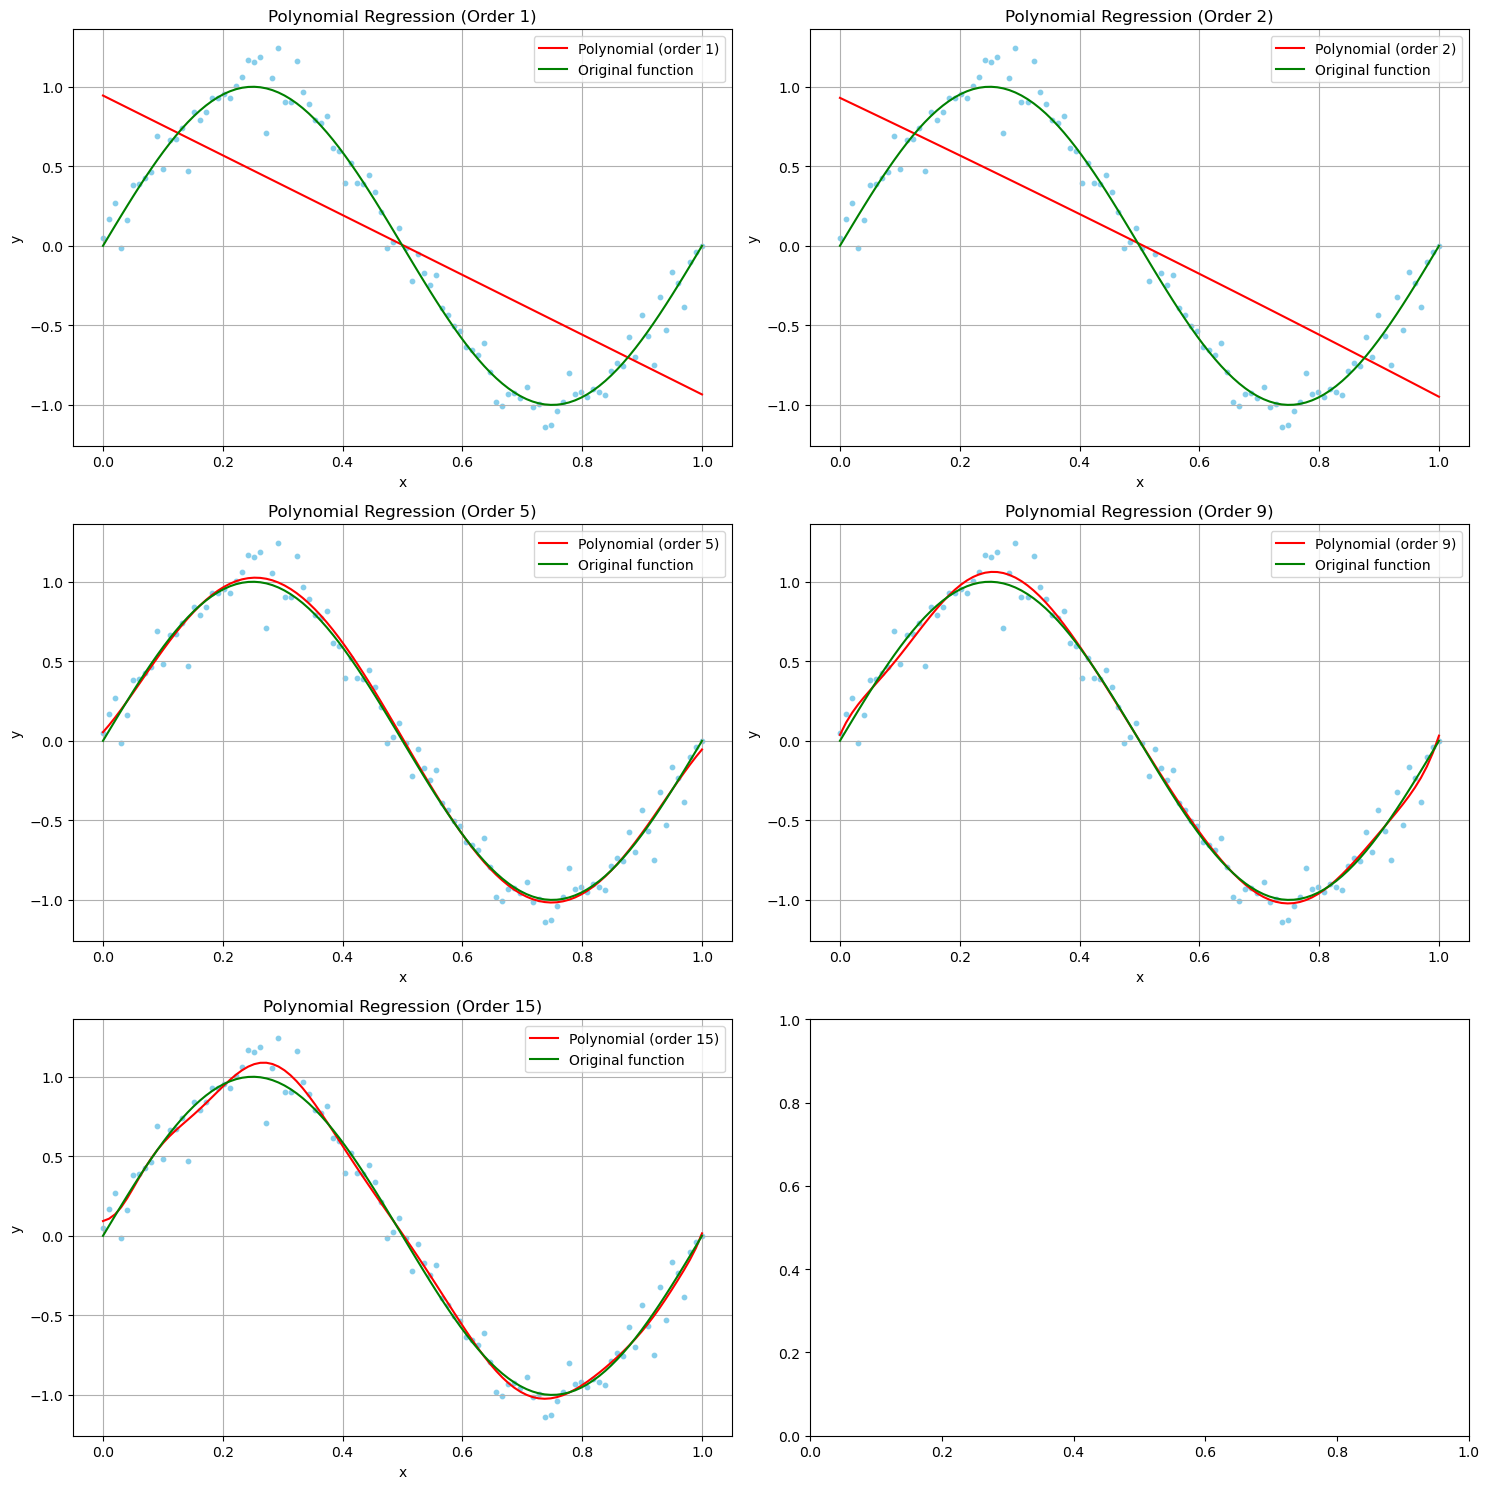

In [7]:
# 100 samples with Gaussian noise
x_new = np.linspace(0, 1, 100)
y_new = np.sin(2 * np.pi * x_new)
noise_new = np.random.normal(0, 0.1, len(x_new))
y_new_noisy = y_new + noise_new

# Subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
orders = [1, 2, 5, 9, 15] # 1, 2, 5, 9, 15 order polynomials
x_test = np.linspace(0, 1, 100).reshape(-1, 1)

for idx, order in enumerate(orders):
    row, col = idx // 2, idx % 2
    
    # Prepare data
    X_new = x_new.reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X_new)
    X_test_poly = poly_features.transform(x_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y_new_noisy)
    y_pred = model.predict(X_test_poly)
    
    # Plot
    axs[row, col].scatter(x_new, y_new_noisy, color='skyblue', marker='o', s=10)
    axs[row, col].plot(x_test, y_pred, 'red', label=f'Polynomial (order {order})')
    axs[row, col].plot(x_test, np.sin(2 * np.pi * x_test), 'green', label='Original function')
    axs[row, col].set_xlabel('x')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f'Polynomial Regression (Order {order})')
    axs[row, col].grid(True)
    axs[row, col].legend()

plt.tight_layout()
plt.show()

##### 2. (Logistic Regression) For MNIST data set, train Logistic Regression Models (with/without L1, L2 regularization) and find the best model that can achieve the highest accuracy on the test data set

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X[:10000]  # First 10,000 samples
y = y[:10000].astype(int)

# Split data (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Regularized Logistic Regression models
models = {
    'No regularization': LogisticRegression(penalty=None),
    'L1 regularization': LogisticRegression(penalty='l1', solver='saga'),
    'L2 regularization': LogisticRegression(penalty='l2', solver='saga'),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}")
    model.fit(X_train_scaled, y_train)
    
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    results[name] = {
        'Training Accuracy': train_score,
        'Test Accuracy': test_score,
    }

# Print results
print("\nResults:")
print("-" * 80)
print(f"{'Model':<25} {'Train Acc':<12} {'Test Acc':<12}")
print("-" * 80)
for name, metrics in results.items():
    print(f"{name:<25} {metrics['Training Accuracy']:.4f}      {metrics['Test Accuracy']:.4f}")

c:\Users\i4u11\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



Training No regularization

Training L1 regularization


c:\Users\i4u11\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Training L2 regularization

Results:
--------------------------------------------------------------------------------
Model                     Train Acc    Test Acc    
--------------------------------------------------------------------------------
No regularization         1.0000      0.8695
L1 regularization         0.9404      0.9075
L2 regularization         0.9413      0.9075


c:\Users\i4u11\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
